#### <b>■ 배운 내용 복습</b>
    <머신러닝 종류>
        1. 지도학습 : 분류: kNN, NaiveBayes, decision tree / 회귀: 단순회귀, 다중회귀
        ↓   - 답이 존재
        2. 비지도학습
        ↓   - 답이 비존재, 스스로 패턴 검색
        3. 강화학습
        ↓    - 상과 벌을 통해 학습을 스스로 진행
        DQN (신경망+강화학습)
        
    <다중회귀 분석 단계>
        1. 데이터 수집 및 설명
        2. 데이터 탐색 및 분석
        3. 머신러닝 모델 훈련
        4. 머신러닝 모델 성능 평가
        5. 머신러닝 모델 성능 개선
            분류 -----> 정확도 향상
            회귀 -----> 결정계수 향상
              파생변수 생성
        

### ※ 문제265. 미국 국민 의료 데이터를 회귀분석하여 회귀식을 도출한 후 아래의 질문에 답하고 예측된 의료비가 출력되게하시오 !


In [ ]:
reg_func <- function(){
  
  insurance <- read.csv('insurance.csv', header=T)
  insurance$bmi30 <- ifelse(insurance$bmi>=30,1,0)
  
  rs_m <- lm(expenses ~ age+age^2+children+bmi+sex+bmi30*smoker+region,data=insurance)
  
  print(summary(rs_m))
  test <- data.frame(age=as.numeric(readline('나이는 어떻게 되십니까? ')),
                     sex=readline('성별이 무엇입니까?(male/female) '),
                     bmi=as.numeric(readline('비만지수는 어떻게 되십니까?(16~59) ')),
                     children=as.numeric(readline('부양가족수는 몇 명입니까? ')),
                     smoker=readline('흡연을 하십니까?(yes/no) '),
                     region=readline('사는 지역은 어디십니까?(southwest/southeast/northwest/northeast) ')
  )
  test$bmi30 <- ifelse(test$bmi>=30,1,0)
  
  rs_p <- predict(rs_m, test)
  print(paste('연간 의료비가 ',round(rs_p,2),'로 예상됩니다.'))
}

reg_func()

## <b> ■ 회귀트리</b>
### <b>1. 회귀트리 : 수치를 예측하는 트리</b>
![의사결정트리](http://cfile253.uf.daum.net/image/99EF3C335EFA62800E19CA)
![회귀트리](http://cfile283.uf.daum.net/image/99A9A3345EFA62A60F65FE)

    회귀트리에 나오는 수치는 평균값
    
<br><br><br>
#### <b>특정숫자를 예측하는데 다중회귀분석을 하지 않고 왜 회귀트리를 사용하는가?</b>
    의료비  <- 부양가족수, 성별, 흡연여부, 나이, 비만지수, 지역
      ↑수치 예측
    집값 <- 평수, 학군, 지역, ...
      ↑수치 예측
    
    수치 예측 작업을 할 때는 일반적으로 전통적인 회귀분석 방법을 가장 먼저 선택하지만 경우에 따라서 수치 의사결정트리가 분명한 이점을 제공
        -> 의사결정트리의 장점을 수치 예측에 활용할 수 있다
            - 의사결정트리는 작업의 특징이 많거나(독립변수가 많거나) 특징과 결과간에 복잡하고 비선형적인 관계를 가질 때 사용 이점이 존재
                -> 회귀의 경우 어려움이 존재
                   독립변수의 개수가 많으면 독립변수들간의 상관관계를 유심히 조사할 필요가 있음 -> 다중공선성 문제가 생기면 회귀분석결과의 신뢰 하락
        -> 회귀트리  <- 회귀 + 의사결정트리의 장점
        -> SDR(표준편차축소)를 사용
![img1](http://cfile284.uf.daum.net/image/991CD73C5EFA65FA114E25)
![sdr1](http://cfile261.uf.daum.net/image/991A414F5EFA6C4A146702)
![sdr2](http://cfile266.uf.daum.net/image/991D854B5EFA6C58130370)        
    

### ※ 문제266. 아래의 책의 그림의 원본 데이터를 A속성으로 나누는게 나은지 B속성으로 나누는게 나은지 SDR을 구해서 알아내시오

In [2]:
origin <- c(1,1,1,2,2,3,4,5,5,6,6,7,7,7,7)
at1 <- c(1,1,1,2,2,3,4,5,5)
at2 <- c(6,6,7,7,7,7)
bt1 <- c(1,1,1,2,2,3,4)
bt2 <- c(5,5,6,6,7,7,7,7)

sdr_a <- sd(origin)-(length(at1)/length(origin)*sd(at1)+length(at2)/length(origin)*sd(at2))
print(sdr_a)

sdr_b <- sd(origin)-(length(bt1)/length(origin)*sd(bt1)+length(bt2)/length(origin)*sd(bt2))
print(sdr_b)

[1] 1.202815
[1] 1.392751


## ■ 와인 데이터의 회귀트리 모델

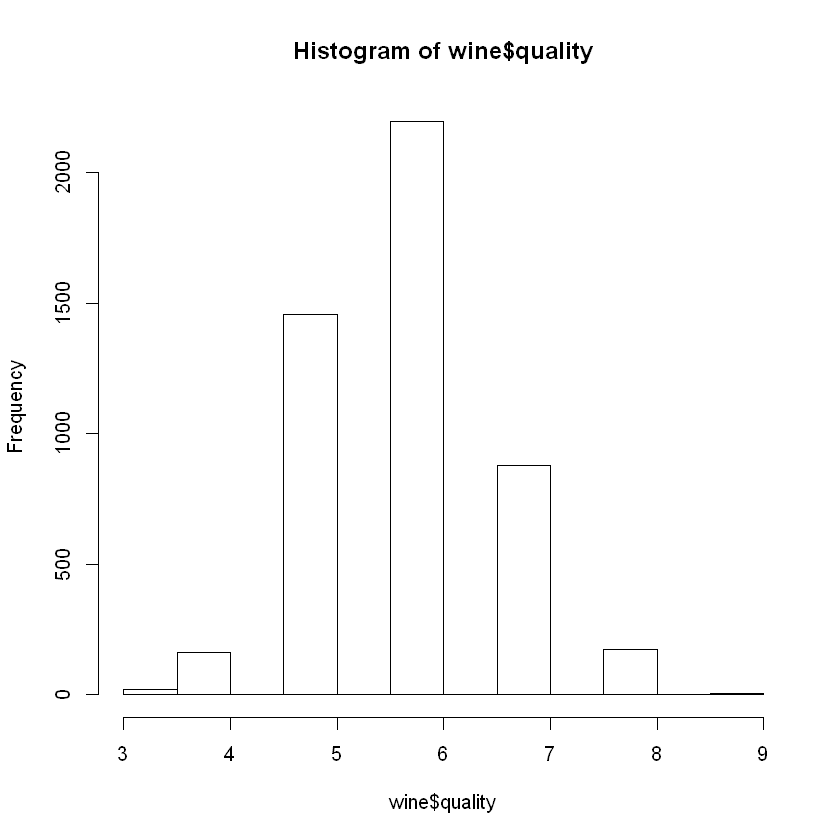

In [3]:
wine <- read.csv("whitewines.csv")

#fixed.acidity       : 고정 산도
#volatile.acidity    : 휘발성 산도
#citric.acid         : 시트르산
#residual.sugar      : 잔류 설탕
#chlorides           : 염화물
#free.sulfur.dioxide : 자유 이산화황
#total.sulfur.dioxide: 총 이산화황
#density             : 밀도
#pH                  : pH
#sulphates           : 황산염
#alcohol             : 알코올
#quality             : 품질

# 2. 와인의 quality 데이터가 정규분포에 속하는 안정적인 데이터 인지 확인
hist(wine$quality)

# 3. wine 데이터를 train 데이터와 test 데이터로 나눈다.
wine_train <- wine[1:3750,  ]

wine_test  <- wine[3751:4898, ]

In [4]:
# 4. train 데이터를 가지고 model 을 생성한다. 
library(rpart)

model <-  rpart( quality ~ . , data=wine_train)
model 

n= 3750 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3750 2945.53200 5.870933  
   2) alcohol< 10.85 2372 1418.86100 5.604975  
     4) volatile.acidity>=0.2275 1611  821.30730 5.432030  
       8) volatile.acidity>=0.3025 688  278.97670 5.255814 *
       9) volatile.acidity< 0.3025 923  505.04230 5.563380 *
     5) volatile.acidity< 0.2275 761  447.36400 5.971091 *
   3) alcohol>=10.85 1378 1070.08200 6.328737  
     6) free.sulfur.dioxide< 10.5 84   95.55952 5.369048 *
     7) free.sulfur.dioxide>=10.5 1294  892.13600 6.391036  
      14) alcohol< 11.76667 629  430.11130 6.173291  
        28) volatile.acidity>=0.465 11   10.72727 4.545455 *
        29) volatile.acidity< 0.465 618  389.71680 6.202265 *
      15) alcohol>=11.76667 665  403.99400 6.596992 *

    *표시가 있는 노드는 잎노드로 노드에서 예측이 이루어진다는 것을 의미
        -> 와인데이터의 예측등급(등급의 평균값)
        
        5.97이라는 등급으로 예를 들면 alcohol < 10.85이고
        volatile.acidity< 0.2275 이면 모든 와인 샘플은 5.97으로 판별

In [9]:
# 5. 위에서 나온 모델로 트리를 시각화 하시오 !
library(rpart.plot)

rpart.plot( model, digits=3)
rpart.plot(model, digits=3, fallen.leaves=T, type=3, extra=101)

ERROR: Error in library(rpart.plot): there is no package called 'rpart.plot'


In [10]:
# 6. 위에서 만든 모델로 테스트 데이터의 라벨을 예측하시오 !
result <- predict(model, wine_test) 
result

3751     3752     3753     3754     3755     3756     3757     3758 
6.596992 5.255814 6.202265 5.971091 5.563380 6.596992 5.255814 5.255814 
    3759     3760     3761     3762     3763     3764     3765     3766 
6.596992 5.563380 5.563380 5.563380 5.255814 5.971091 5.255814 5.369048 
    3767     3768     3769     3770     3771     3772     3773     3774 
6.596992 5.563380 5.255814 5.971091 5.971091 5.971091 5.563380 5.255814 
    3775     3776     3777     3778     3779     3780     3781     3782 
5.971091 5.563380 5.255814 5.255814 6.202265 6.202265 5.255814 5.971091 
    3783     3784     3785     3786     3787     3788     3789     3790 
5.255814 6.202265 6.202265 5.971091 5.255814 6.202265 6.596992 6.202265 
    3791     3792     3793     3794     3795     3796     3797     3798 
5.971091 5.563380 6.202265 5.971091 5.563380 5.563380 5.563380 6.596992 
    3799     3800     3801     3802     3803     3804     3805     3806 
5.255814 6.202265 6.596992 5.563380 6.202265 6.202265 6.596992 6.202265 
    3807     3808     3809     3810     3811     3812     3813     3814 
6.202265 6.596992 4.545455 5.563380 5.255814 5.563380 5.563380 5.563380 
    3815     3816     3817     3818     3819     3820     3821     3822 
5.563380 5.255814 5.563380 5.563380 5.971091 6.202265 6.596992 6.202265 
    3823     3824     3825     3826     3827     3828     3829     3830 
5.255814 5.255814 5.971091 6.596992 5.971091 5.563380 5.971091 5.255814 
    3831     3832     3833     3834     3835     3836     3837     3838 
5.255814 5.971091 5.563380 6.202265 5.563380 5.971091 5.369048 6.596992 
    3839     3840     3841     3842     3843     3844     3845     3846 
5.971091 5.563380 6.596992 5.971091 5.255814 6.202265 5.971091 5.255814 
    3847     3848     3849     3850     3851     3852     3853     3854 
5.563380 6.596992 6.202265 5.255814 6.202265 6.596992 5.971091 5.563380 
    3855     3856     3857     3858     3859     3860     3861     3862 
5.971091 6.202265 5.255814 6.202265 5.255814 6.202265 6.202265 5.563380 
    3863     3864     3865     3866     3867     3868     3869     3870 
5.971091 6.202265 5.255814 5.369048 5.255814 5.563380 5.971091 6.202265 
    3871     3872     3873     3874     3875     3876     3877     3878 
5.971091 5.971091 5.255814 5.563380 5.563380 6.202265 5.255814 5.255814 
    3879     3880     3881     3882     3883     3884     3885     3886 
5.255814 5.563380 6.202265 5.971091 5.971091 5.255814 5.563380 6.202265 
    3887     3888     3889     3890     3891     3892     3893     3894 
5.255814 5.971091 5.563380 5.971091 6.202265 5.563380 5.563380 6.202265 
    3895     3896     3897     3898     3899     3900     3901     3902 
5.971091 6.202265 5.971091 6.596992 5.255814 5.255814 5.563380 5.971091 
    3903     3904     3905     3906     3907     3908     3909     3910 
5.255814 5.563380 6.596992 6.596992 5.971091 6.596992 5.563380 5.971091 
    3911     3912     3913     3914     3915     3916     3917     3918 
6.202265 5.563380 5.971091 6.202265 5.563380 6.202265 6.202265 5.255814 
    3919     3920     3921     3922     3923     3924     3925     3926 
5.971091 5.255814 5.971091 5.971091 5.971091 5.971091 6.596992 5.255814 
    3927     3928     3929     3930     3931     3932     3933     3934 
5.255814 5.971091 6.596992 5.563380 5.563380 5.971091 5.255814 5.971091 
    3935     3936     3937     3938     3939     3940     3941     3942 
6.202265 5.971091 5.255814 6.596992 5.563380 6.596992 5.255814 5.563380 
    3943     3944     3945     3946     3947     3948     3949     3950 
5.563380 6.596992 6.202265 6.596992 5.563380 6.202265 6.596992 6.596992 
    3951     3952     3953     3954     3955     3956     3957     3958 
6.596992 6.202265 6.596992 5.971091 5.971091 6.596992 5.563380 6.202265 
    3959     3960     3961     3962     3963     3964     3965     3966 
6.202265 6.596992 5.255814 5.255814 5.255814 6.202265 5.255814 6.202265 
    3967     3968     3969     3970     3971     3972     3973

In [12]:
# 7. 테스트 데이터의 실제 라벨(품질) 과 예측결과(품질) 을 비교한다
cbind( round(result), wine_test$quality)

# 8. 테스트 데이터의 라벨과 예측 결과와 상관관계가 어떻게 되는지  확인한다.
print(cor(result, wine_test$quality))

3751,7,6
3752,5,5
3753,6,6
3754,6,6
3755,6,5
3756,7,7
3757,5,6
3758,5,5
3759,7,7
3760,6,6
3761,6,5


[1] 0.5369525


In [14]:
# 9. 두 데이터간의 오차율을 확인 
MAE <-  function( actual, predicted) {
             mean(  abs( actual - predicted) ) 
}
print(MAE(result, wine_test$quality))

[1] 0.5872652


    SVM에서는 오차가 0.45인데 0.58이면 상대적으로 큰 오차이므로 개선이 필요